Code for assignment 4

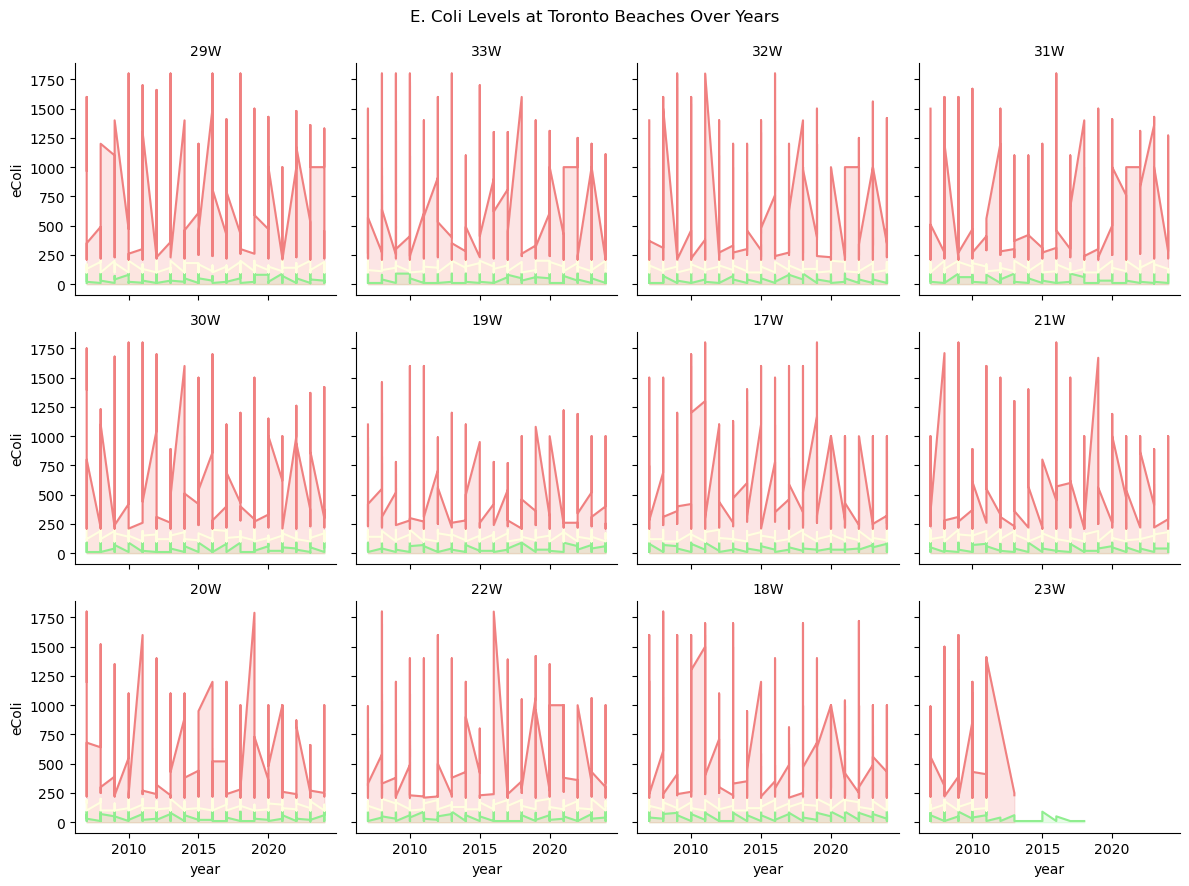

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:\\GitHub\\visualization\\02_activities\\assignments\\toronto-beaches-water-quality - 4326.xlsx'
data = pd.read_excel(file_path, sheet_name='toronto-beaches-water-quality -')

# Convert collectionDate to datetime
data['collectionDate'] = pd.to_datetime(data['collectionDate'])

# Extract year from collectionDate
data['year'] = data['collectionDate'].dt.year

# Define color scale based on E. Coli levels
def color_scale(value):
    if value < 100:
        return 'green'
    elif 100 <= value <= 200:
        return 'yellow'
    else:
        return 'red'

# Apply the color scale to the eColi column
data['color'] = data['eColi'].apply(color_scale)

# Create a FacetGrid for the siteName
g = sns.FacetGrid(data, col='siteName', col_wrap=4, hue='color', palette=['lightgreen', 'lightyellow', 'lightcoral'])

# Add the line plot for eColi levels over the years
g = g.map(plt.plot, 'year', 'eColi')

# Fill the area under the curve
g = g.map(plt.fill_between, 'year', 'eColi', alpha=0.2)

# Control the title of each facet
g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('E. Coli Levels at Toronto Beaches Over Years')

# Show the graph
plt.show()